In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('PEP1.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [10]:
null=df.isnull().sum()
null[null>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
print('int64:')
print(df.select_dtypes('int64').columns)
print('float64:')
print(df.select_dtypes('float64').columns)
print('object:')
print(df.select_dtypes('object').columns)

int64:
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
float64:
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
object:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType

In [12]:
df.select_dtypes('int64').head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [42]:
null=df.select_dtypes('int64').isnull().sum()
null[null>0]

Series([], dtype: int64)

In [14]:
df.select_dtypes('float64').head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [16]:
df.select_dtypes('float64').isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [20]:
df.select_dtypes('object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
null=df.select_dtypes('object').isnull().sum()
null[null>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


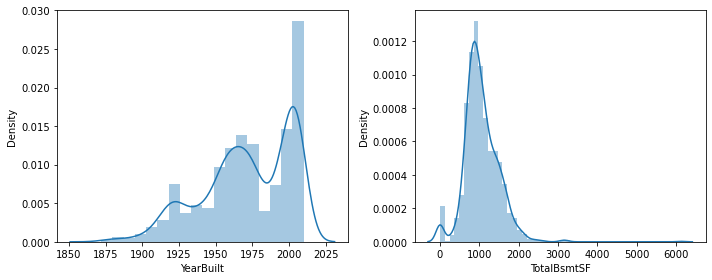

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


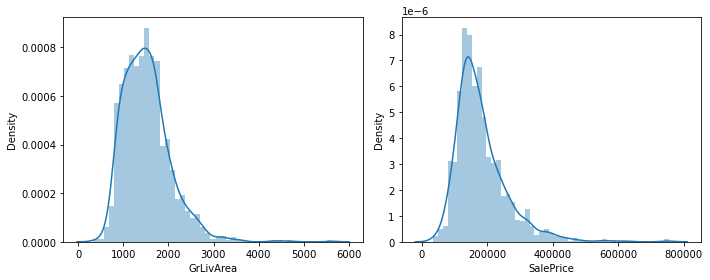

In [58]:
cols = ['YearBuilt', 'TotalBsmtSF','GrLivArea','SalePrice']

for i in range(0,len(cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[cols[i]], hist=True,kde=True)
        plt.subplot(122)            
        sns.distplot(df[cols[i+1]],hist=True, kde=True)
        plt.tight_layout()
        plt.show() 

In [51]:
corr_matrix=df.corr()

In [52]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchebvGr      -0.135907
Name: SalePr

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

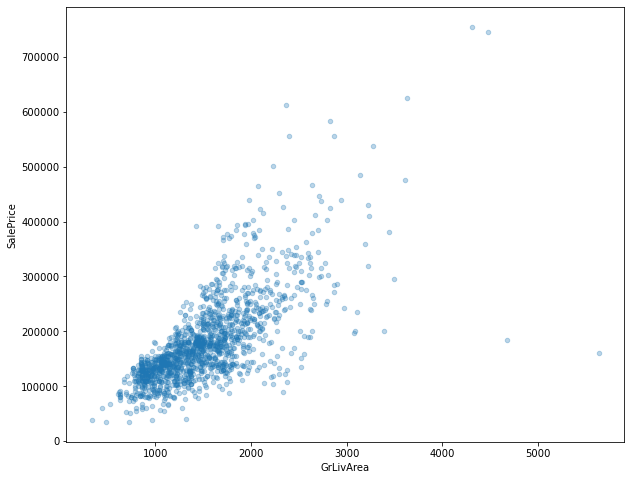

In [77]:
df.plot(kind='scatter',x='GrLivArea',y='SalePrice',alpha=0.3,figsize=(10,8))

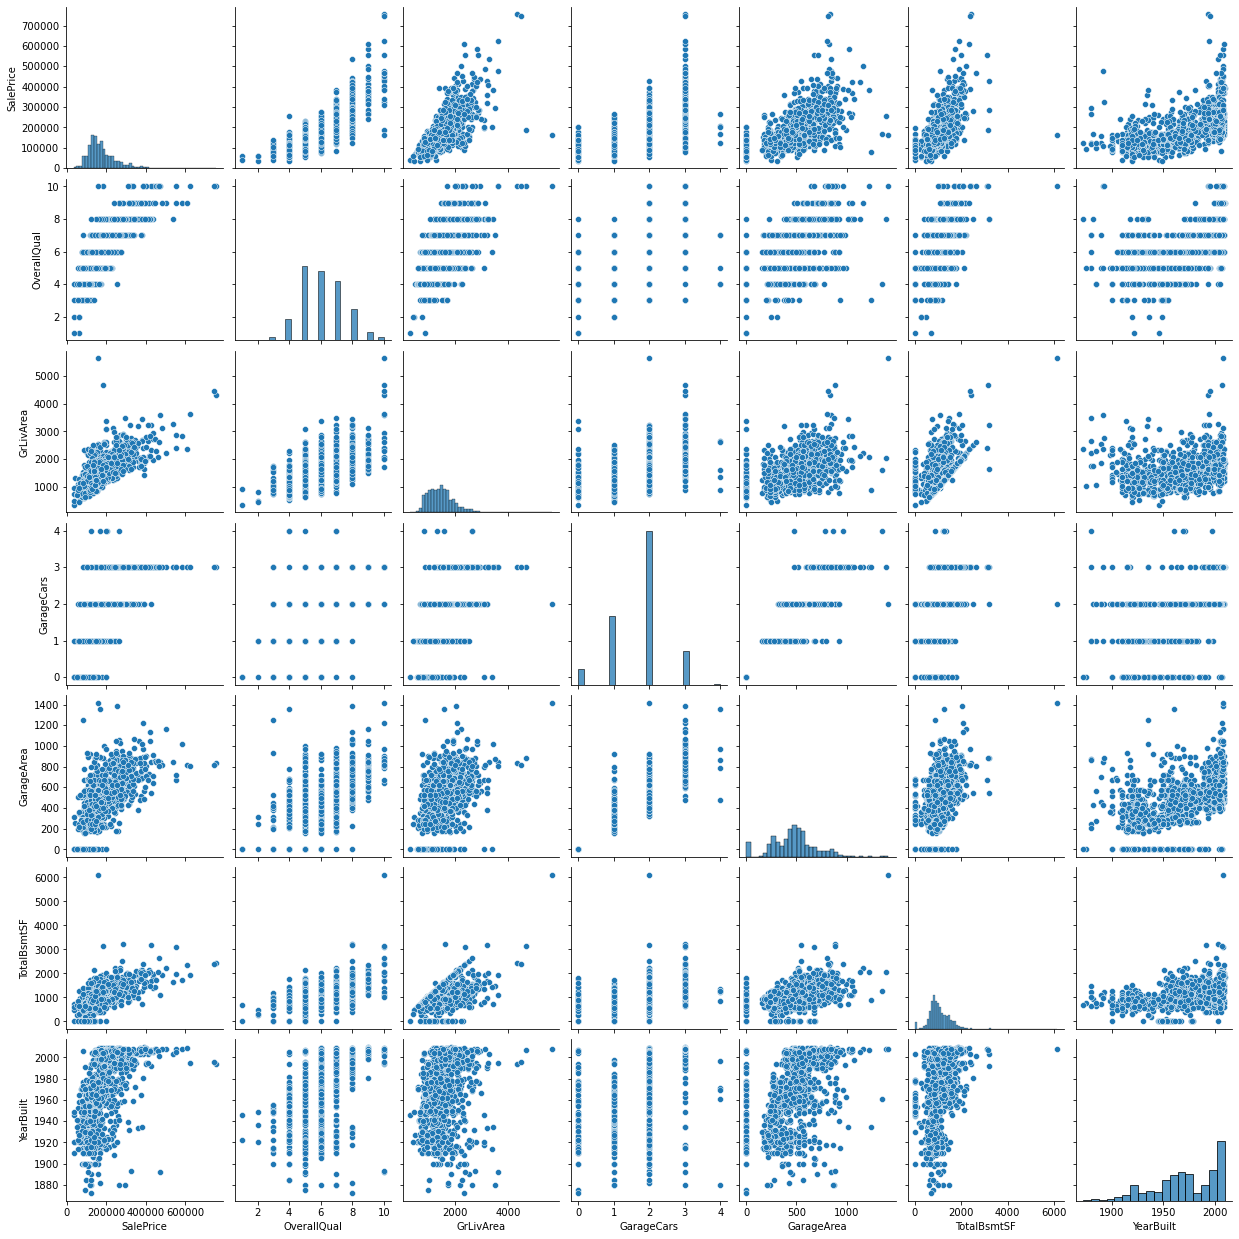

In [62]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','YearBuilt']
sns.pairplot(df[cols])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


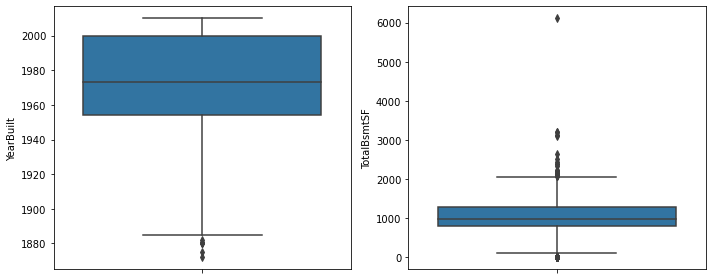

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


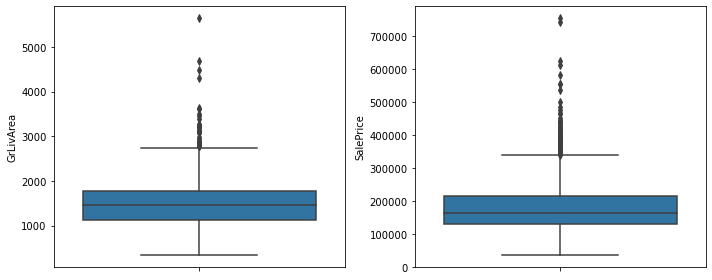

In [63]:
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']

facet = None

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = df)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = df)
        plt.tight_layout()
        plt.show()

<AxesSubplot:>

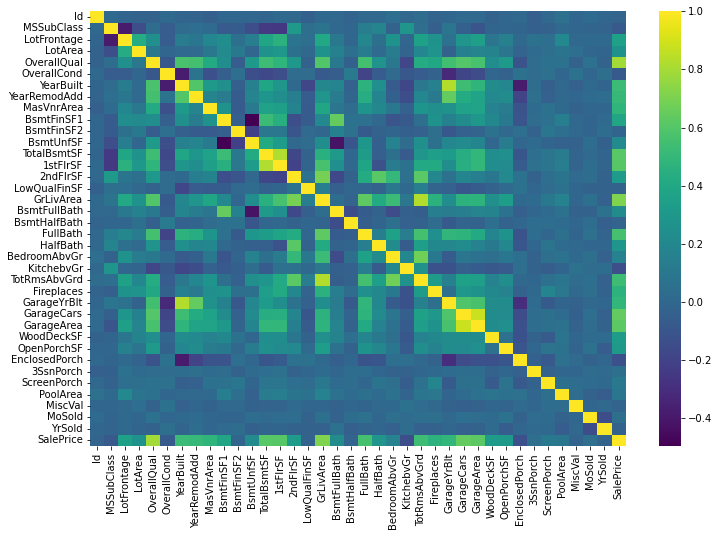

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis')

<AxesSubplot:>

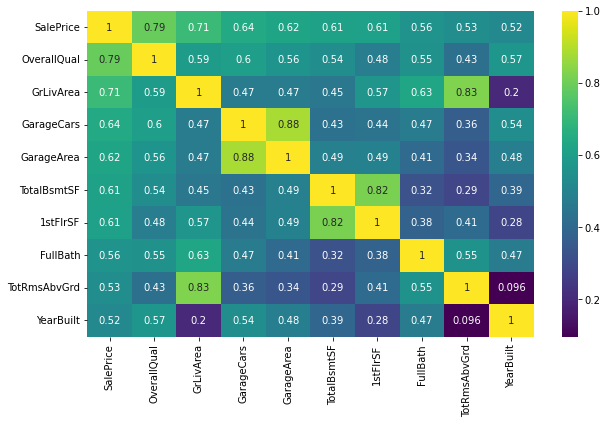

In [80]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

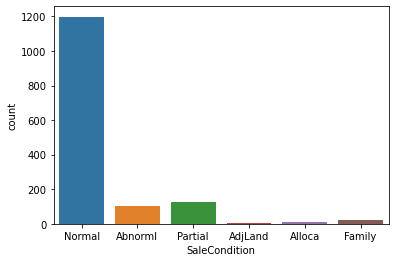

In [64]:
sns.countplot(df['SaleCondition'])

In [65]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Utilities', ylabel='count'>

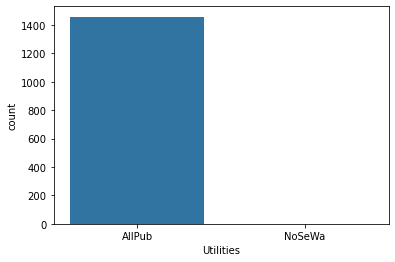

In [66]:
sns.countplot(df['Utilities'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'mes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'StoneBr'),
 Text(19, 0, 'ClearCr'),
 Text(20, 0, 'NPkVill'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

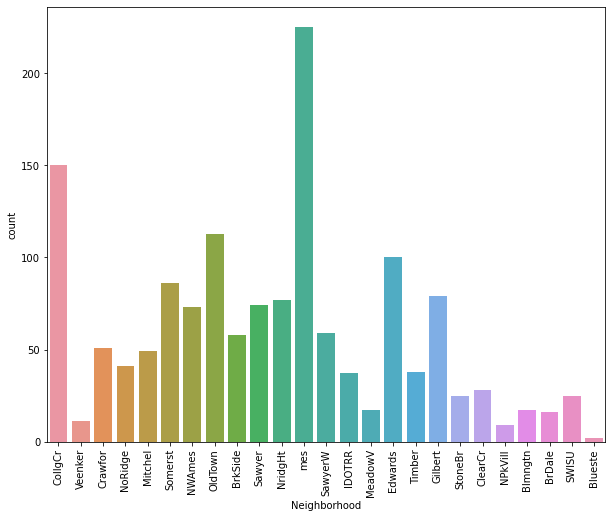

In [73]:
plt.figure(figsize=(10,8))
plot=sns.countplot(df['Neighborhood'])
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

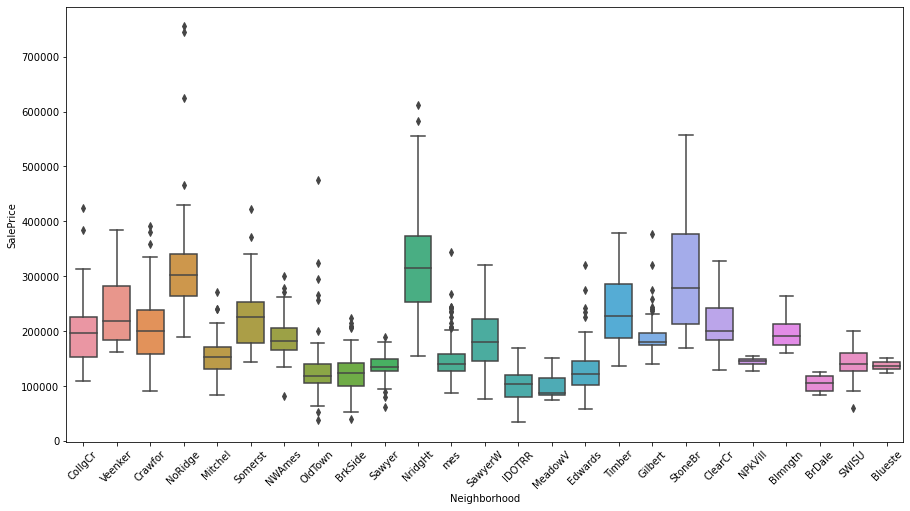

In [81]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

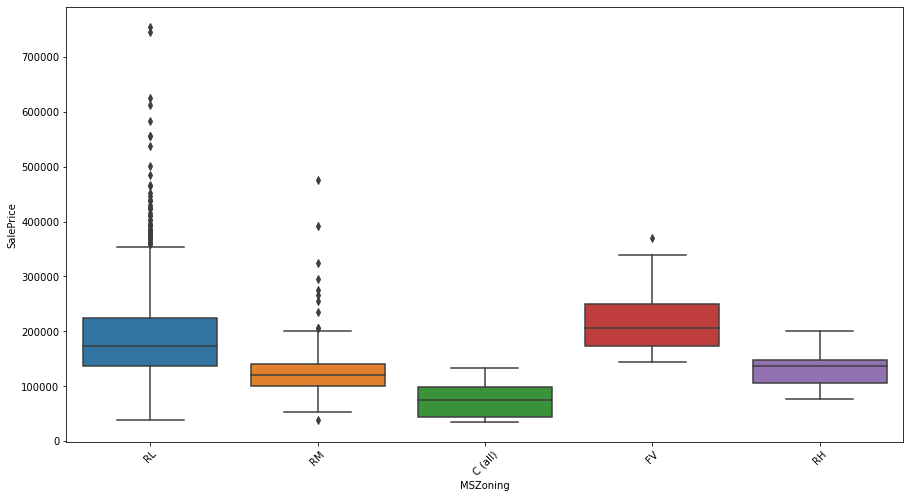

In [86]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('MSZoning', 'SalePrice', data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

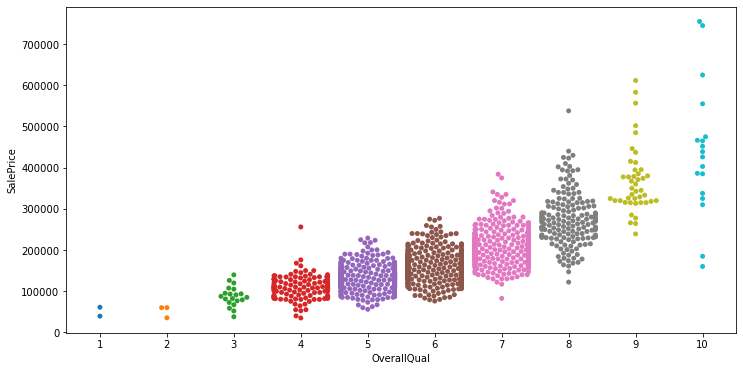

In [82]:
plt.figure(figsize=(12,6))
sns.swarmplot('OverallQual', 'SalePrice', data=df)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

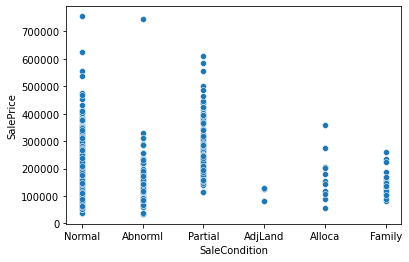

In [95]:
sns.scatterplot(data=df, x="SaleCondition", y="SalePrice")

In [104]:
df1 = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street','Alley', 'LotShape', 'LandContour',
              'Utilities', 'LotConfig','LandSlope', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'YearRemodAdd',
              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond', 
              'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2',
              'BsmtUnfSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 
              'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual','Functiol', 'Fireplaces',
              'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish','GarageCond','PavedDrive', 'WoodDeckSF',
              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
              'MiscVal','MoSold', 'YrSold', 'SaleType','GarageQual']
df.drop(df1, axis=1)

,Neighborhood,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,CollgCr,7,5,2003,856,856,1710,2,8,2,548,Normal,208500
1,Veenker,6,8,1976,1262,1262,1262,2,6,2,460,Normal,181500
2,CollgCr,7,5,2001,920,920,1786,2,6,2,608,Normal,223500
3,Crawfor,7,5,1915,756,961,1717,1,7,3,642,Abnorml,140000
4,NoRidge,8,5,2000,1145,1145,2198,2,9,3,836,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,5,1999,953,953,1647,2,7,2,460,Normal,175000
1456,NWAmes,6,6,1978,1542,2073,2073,2,7,2,500,Normal,210000
1457,Crawfor,7,9,1941,1152,1188,2340,2,9,1,252,Normal,266500
1458,mes,5,6,1950,1078,1078,1078,1,5,1,240,Normal,142125


In [106]:
df.shape

(1460, 81)

In [107]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

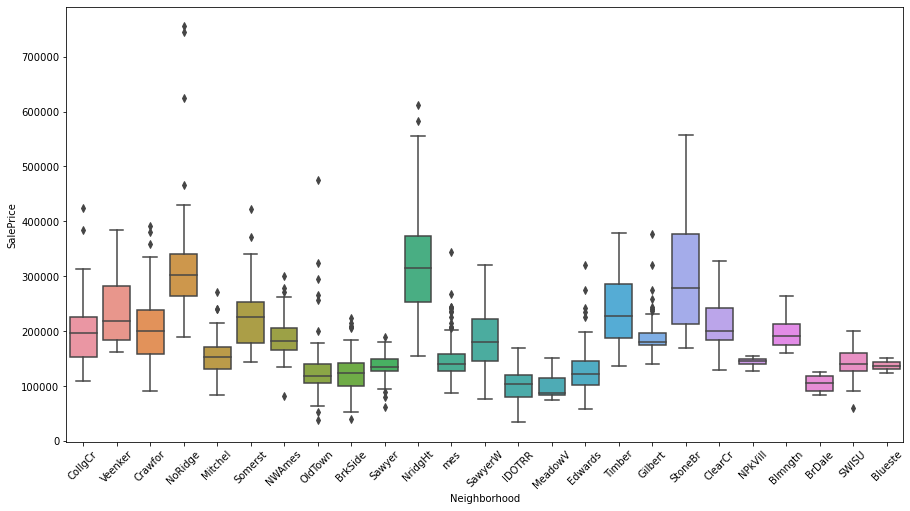

In [113]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=df)

In [117]:
anova_df=pd.DataFrame()
anova_df['Neighborhood']=df['Neighborhood']
anova_df['SalePrice']=df['SalePrice']
anova_df.dropna(inplace=True)
anova_df.head()

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
4,NoRidge,250000


H0 = there is no significant difference in Neighborhood of different SalePrice 
H1 = There is a significant difference in Neighborhood of different SalePrice


In [118]:
lm=ols("SalePrice~Neighborhood",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
Neighborhood,24.0,5.023606e+12,2.093169e+11,71.784865,1.558600e-225
Residual,1435.0,4.184305e+12,2.915892e+09,NaN,NaN


h0 = SalePrice and OverallQual type are independent 
h1 = SalePrice and OverallQual type are dependent


In [119]:
chi_sq=pd.DataFrame()
chi_sq['SalePrice']=df['SalePrice']
chi_sq['OverallQual']=df['OverallQual']
chi_sq.dropna(inplace=True)
chi_sq.head()


,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


In [120]:
data_crosstab = pd.crosstab( chi_sq["SalePrice"],chi_sq["OverallQual"])

In [121]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
alpha = 0.05
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)')

Dependent (reject H0)
